
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению
    
Автор материала: Мария Мансурова, аналитик-разработчик в команде Яндекс.Метрики. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 9. (демо)
## <center> Анализ временных рядов
    


In [ ]:
import os

import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

print(__version__)  # need 1.9.0 or greater

init_notebook_mode(connected=True)

5.15.0


## Подготавливаем данные

Для начала скачаем данные в `dataframe`. Сегодня будем предсказывать просмотры wiki-страницы [Machine Learning](https://en.wikipedia.org/wiki/Machine_learning). Данные я скачала с помощью библиотеки [Wikipediatrend](https://www.r-bloggers.com/using-wikipediatrend/) для `R`.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/My Drive/wiki_machine_learning.csv", sep=" ")
df = df[df['count'] != 0]
df.head()

Mounted at /content/gdrive


,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [ ]:
df.shape

(383, 7)

In [ ]:
df.date = pd.to_datetime(df.date)

In [ ]:
df

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
...,...,...,...,...,...,...,...
382,2016-01-16,1644,en,Machine_learning,8708,201601,Machine_learning
381,2016-01-17,1836,en,Machine_learning,8708,201601,Machine_learning
376,2016-01-18,2983,en,Machine_learning,8708,201601,Machine_learning
375,2016-01-19,3389,en,Machine_learning,8708,201601,Machine_learning


## Предсказание с помощью Facebook Prophet

Для начала построим предсказание с помощью простой библиотеки `Facebook Prophet`. Для того, чтобы посмотреть на качество модели, отбросим из обучающей выборки последние 30 дней.

In [ ]:
!pip install prophet

from prophet import Prophet

In [ ]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
train_df = df[:-predictions].copy()

In [ ]:
## ВАШ КОД для оценки качества полученной модели ##

prophet1 = Prophet()
prophet1.fit(train_df);

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvksqiqo3/j30qesmo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvksqiqo3/d6o9mef7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73961', 'data', 'file=/tmp/tmpvksqiqo3/j30qesmo.json', 'init=/tmp/tmpvksqiqo3/d6o9mef7.json', 'output', 'file=/tmp/tmpvksqiqo3/prophet_modelm5siptwu/prophet_model-20231202223946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:39:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Вопрос 1:** Какое предсказание числа просмотров wiki-страницы на 20 января? Ответ округлите до целого числа.

Оценим качество предсказания по последним 30 точкам.

In [ ]:
future = prophet1.make_future_dataframe(periods=predictions)
future.tail(n=1)

,ds
382,2016-01-20


In [ ]:
forecast = prophet1.predict(future)
forecast.tail(n=1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
382,2016-01-20,2996.332313,3003.426763,3835.77136,2973.973693,3021.11068,425.485568,425.485568,425.485568,425.485568,425.485568,425.485568,0.0,0.0,0.0,3421.817881


In [ ]:
print("Предсказание числа просмотров wiki-страницы на 20 января: " + str(int(forecast.tail(n=1)["yhat"])))

Предсказание числа просмотров wiki-страницы на 20 января: 3421


**Вопрос 2**: Какое получилось MAPE?

**Вопрос 3**: Какое получилось MAE?

In [ ]:
df2 = df.set_index("ds").join(forecast.set_index("ds")[["yhat"]])
df2

,y,yhat
ds,,
2015-01-01,1414,2486.364327
2015-01-02,1920,2169.284822
2015-01-03,1338,1303.348628
2015-01-04,1404,1447.156607
2015-01-05,2264,2452.081595
...,...,...
2016-01-16,1644,2113.305928
2016-01-17,1836,2259.623088
2016-01-18,2983,3267.057256


In [ ]:
import numpy as np

df2['e'] = df2['y'] - df2['yhat']
print(f'MAE = {np.mean(abs(df2[-predictions:]["e"]))}')
df2['pe'] = df2['e'] / df2['y'] * 100
print(f'MAPE = {np.mean(abs(df2[-predictions:]["pe"]))}')

MAE = 596.5328223327066
MAPE = 34.34570128132223


## Предсказываем с помощью ARIMA

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

**Вопрос 4:** Проверим стационарность ряда с помощью критерия Дики-Фулера. Является ли ряд стационарным? Какое значение p-value?

Критерий Дики-Фулера: 0.10739219627612118


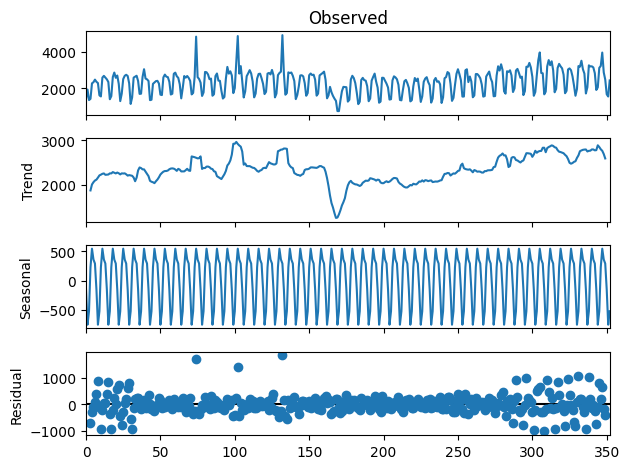

In [ ]:
## ВАШ КОД для проверки стационарности ряда
sm.tsa.seasonal_decompose(train_df["y"].values, period=7).plot()
# по графику не стационарный
critery = sm.tsa.stattools.adfuller(train_df["y"])[1]
print(f"Критерий Дики-Фулера: {critery}")

**Вопрос 5**: Далее перейдем к построению модели SARIMAX (`sm.tsa.statespace.SARIMAX`). Модель c какими параметрами лучшая по `AIC`-критерию?

In [ ]:
## ВАШ КОД для построения модели ##
import warnings
import scipy.stats
from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")
#--------------------------------
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
#-------------------
train_df["y_box"], lmbda = scipy.stats.boxcox(train_df["y"])

results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    # try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model = sm.tsa.statespace.SARIMAX(
            train_df["y_box"],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], 7),
            # train the model as is even if that would lead to a non-stationary / non-invertible model
            # see https://github.com/statsmodels/statsmodels/issues/6225 for details
            enforce_stationary=False,
            enforce_invertibility=False
        ).fit(disp=-1)

    except (ValueError, np.linalg.LinAlgError):
        continue

    aic = model.aic
    # save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])

result_table2 = pd.DataFrame(results2)
result_table2.columns = ["parameters", "aic"]
print(result_table2.sort_values(by="aic", ascending=True).head())
#---------------------------------------------------------------
warnings.filterwarnings("default")


best_model = sm.tsa.statespace.SARIMAX(
    train_df["y_box"],
    order=(1, 0, 2),
    seasonal_order=(3, 2, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit(disp=-1)

print(best_model.summary())

  0%|          | 0/384 [00:00<?, ?it/s]

             parameters          aic
257  (1, 0, 2, 3, 0, 1)    16.000000
41   (0, 0, 1, 3, 0, 0)   101.753969
261  (1, 0, 2, 3, 2, 1)  3528.511392
284  (1, 0, 3, 3, 2, 1)  3529.820329
213  (1, 0, 0, 3, 2, 1)  3530.231534


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                                      SARIMAX Results                                      
Dep. Variable:                               y_box   No. Observations:                  353
Model:             SARIMAX(1, 0, 2)x(3, 2, [1], 7)   Log Likelihood               -1638.320
Date:                             Sun, 03 Dec 2023   AIC                           3292.640
Time:                                     00:33:39   BIC                           3322.711
Sample:                                          0   HQIC                          3304.652
                                             - 353                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8153      0.115      7.091      0.000       0.590       1.041
ma.L1         -0.3308      

1 0 0 3 2 1
